In [2]:
import cv2

print (cv2.__version__)

4.2.0


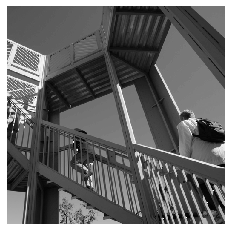

In [20]:
import numpy as np 
from scipy import misc
import matplotlib.pyplot as plt

item = misc.ascent()
plt.grid(False)
#plt.gray()
plt.axis('off')
plt.imshow(item)
plt.show()


In [21]:
print (item) #image in matrix form.

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


In [22]:
item_transformed = np.copy(item)

if (item_transformed.all() == item.all()) :
    print ("both matix are equals")

(n,m) = (item.shape[0],item.shape[1])
print (n, m)
print ("number of elements in matrix " ,item.size)
print ("max and min of the matix i are : {0} , {1} " ,np.max(item) , np.min(item))



both matix are equals
512 512
number of elements in matrix  262144
max and min of the matix i are : {0} , {1}  255 0


In [25]:
#filter matix 
filter_horizontal = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filter_vertical =  [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1


In [31]:
#convolution product of matix 512 * 512 marix with filter matix
filter = filter_horizontal
for i in range (1, n - 1) :
    for j in range (1, m -1): 0 
        print (item[i-1,j-1] * filter[0][0])
        elmt = elmt + (item[i-1,j-1] * filter[0][0]) + (item[i,j-1] * filter[0][1]) + (item[i+1,j-1] * filter[0][2])
        elmt = elmt + (item[i-1,j] * filter[1][0]) + (item[i,j] * filter[1][1]) + (item[i+1,j] * filter[1][2])
        elmt = elmt + (item[i-1,j+1] * filter[2][0]) + (item[i,j+1] * filter[2][1]) + (item[i+1,j+1] * filter[2][2])
        if (elmt < 0 ):
            elmt = 0
        if (elmt > 255) :
            elmt = 255
        item_transformed[i,j] = elmt

print (item_transformed)


IndentationError: unexpected indent (<ipython-input-31-1587b3589f6e>, line 5)